# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Amir Mohammad Yaghoobian zadeh
2.   Student Number: 401300525


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
from google.colab import drive
drive.mount('/content/gdrive')

plays = pd.read_csv('gdrive/MyDrive/Deep learning/HW1/data/user_artists.dat', sep='\t')
artists = pd.read_csv('gdrive/MyDrive/Deep learning/HW1/data/artists.dat', sep='\t', usecols=['id','name'])

Mounted at /content/gdrive


# Preprocessing (20 pts)

In [3]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

temp = plays.sort_values(by=['artistID']).reset_index(drop=True)
_, rep = np.unique(temp['artistID'], return_counts=True)
temp3 = artists.iloc[artists.index.repeat(rep)].reset_index(drop=True)
ap = pd.concat([temp3,temp],axis=1)

display(ap)


id              name  userID  artistID  weight
0          1      MALICE MIZER     274         1     483
1          1      MALICE MIZER     785         1      76
2          1      MALICE MIZER      34         1     212
3          2   Diary of Dreams     935         2     428
4          2   Diary of Dreams    1601         2     385
...      ...               ...     ...       ...     ...
92829  18741    Diamanda Galás     454     18741     301
92830  18742            Aya RL     454     18742     294
92831  18743       Coptic Rain     454     18743     287
92832  18744      Oz Alchemist     454     18744     286
92833  18745  Grzegorz Tomczak     585     18745     426

[92834 rows x 5 columns]

In [ ]:
ap

id              name  userID  artistID  weight
0          1      MALICE MIZER      34         1     212
1          1      MALICE MIZER     274         1     483
2          1      MALICE MIZER     785         1      76
3          2   Diary of Dreams     135         2    1021
4          2   Diary of Dreams     257         2     152
...      ...               ...     ...       ...     ...
92829  18741    Diamanda Galás     454     18741     301
92830  18742            Aya RL     454     18742     294
92831  18743       Coptic Rain     454     18743     287
92832  18744      Oz Alchemist     454     18744     286
92833  18745  Grzegorz Tomczak     585     18745     426

[92834 rows x 5 columns]

In [4]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [5]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################

ap = ap.drop(['id'], axis=1)
ap = ap.reset_index(drop=True)
display(ap)

name  userID  artistID  playCount
0          MALICE MIZER     274         1        483
1          MALICE MIZER     785         1         76
2          MALICE MIZER      34         1        212
3       Diary of Dreams     935         2        428
4       Diary of Dreams    1601         2        385
...                 ...     ...       ...        ...
92829    Diamanda Galás     454     18741        301
92830            Aya RL     454     18742        294
92831       Coptic Rain     454     18743        287
92832      Oz Alchemist     454     18744        286
92833  Grzegorz Tomczak     585     18745        426

[92834 rows x 4 columns]

In [6]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################


artist_rank_bs = pd.DataFrame() #before sorting
artist_rank_bs['name'] = ap['name'].unique()
artist_rank_bs['totalUniqueUsers'] = rep

temp = ap['playCount'].cumsum()[rep.cumsum()-1].reset_index(drop=True)
temp2 = temp.diff()
temp2[0] = temp[0]
artist_rank_bs['totalArtistPlays'] = np.asarray(temp2, dtype=np.int64)

artist_rank_bs['avgUserPlays'] = artist_rank_bs['totalArtistPlays'] / artist_rank_bs['totalUniqueUsers']
artist_rank = artist_rank_bs.sort_values(by=['totalArtistPlays'], ascending=False)

rep_new = rep[artist_rank.index]
# print(artist_rank.index)
# print(rep_new)
artist_rank = artist_rank.reset_index(drop=True)
display(artist_rank)

name  totalUniqueUsers  totalArtistPlays  avgUserPlays
0          Britney Spears               522           2393140   4584.559387
1            Depeche Mode               282           1301308   4614.567376
2               Lady Gaga               611           1291387   2113.563011
3      Christina Aguilera               407           1058405   2600.503686
4                Paramore               399            963449   2414.659148
...                   ...               ...               ...           ...
17627           K-Precise                 1                 1      1.000000
17628              ZÜNDER                 1                 1      1.000000
17629     Evil Masquerade                 1                 1      1.000000
17630             Gosling                 1                 1      1.000000
17631              Kalson                 1                 1      1.000000

[17632 rows x 4 columns]

In [ ]:
artist_rank

totalUniqueUsers  totalArtistPlays  avgUserPlays
name                                                                
Britney Spears                   522           2393140   4584.559387
Depeche Mode                     282           1301308   4614.567376
Lady Gaga                        611           1291387   2113.563011
Christina Aguilera               407           1058405   2600.503686
Paramore                         399            963449   2414.659148
...                              ...               ...           ...
Morris                             1                 1      1.000000
Eddie Kendricks                    1                 1      1.000000
Excess Pressure                    1                 1      1.000000
My Mine                            1                 1      1.000000
A.M. Architect                     1                 1      1.000000

[17632 rows x 3 columns]

In [7]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################

from itertools import chain

temp = [[i]*j for i,j in enumerate(rep)]
# temp = sum(temp,[])
temp = list(chain(*temp))
temp = artist_rank_bs.iloc[temp].drop(['name'], axis=1).reset_index(drop=True)

ap2 = pd.DataFrame()
ap2['id'] = ap['userID']
ap2 = pd.concat([ap2,ap,temp],axis=1)

ap = ap2.sort_values(by=['playCount'], ascending=False)
# display(ap)
ap.head(20)

id                name  userID  artistID  playCount  \
2698   1642        Depeche Mode    1642        72     352698   
35825  2071              Thalía    2071       792     324663   
27265  1094                  U2    1094       511     320725   
8081   1905                Blur    1905       203     257978   
26561  1664            Paramore    1664       498     227829   
21105  1146         Evanescence    1146       378     203165   
14065   514  Christina Aguilera     514       292     176133   
33202  1983             Shakira    1983       701     172496   
33016   757             Shakira     757       701     169596   
31760  1086           Glee Cast    1086       679     165902   
27005   903           In Flames     903       503     146411   
32507   946        All Time Low     946       687     144559   
13179   542      Britney Spears     542       289     131733   
21238   938         Evanescence     938       378     129595   
13414  2031      Britney Spears    2031       289     128654   
25844  1368  30 Seconds to Mars    1368       486     125471   
5777    292          Pink Floyd     292       163     123065   
3793   1135           Lady Gaga    1135        89     114672   
6806    442                a-ha     442       187     112009   
7810    459    System of a Down     459       198     110185   

       totalUniqueUsers  totalArtistPlays  avgUserPlays  
2698                282           1301308   4614.567376  
35825                26            350035  13462.884615  
27265               185            493024   2664.994595  
8081                114            318221   2791.412281  
26561               399            963449   2414.659148  
21105               226            513476   2272.017699  
14065               407           1058405   2600.503686  
33202               319            688529   2158.398119  
33016               319            688529   2158.398119  
31760               249            506453   2033.947791  
27005                67            237148   3539.522388  
32507                77            215777   2802.298701  
13179               522           2393140   4584.559387  
21238               226            513476   2272.017699  
13414               522           2393140   4584.559387  
25844               216            485532   2247.833333  
5777                258            466104   1806.604651  
3793                611           1291387   2113.563011  
6806                 97            205195   2115.412371  
7810                181            277397   1532.580110

In [ ]:
ap.head(20)

id                name  ...  totalArtistPlays  avgUserPlays
2800    72        Depeche Mode  ...           1301308   4614.567376
35843  792              Thalía  ...            350035  13462.884615
27302  511                  U2  ...            493024   2664.994595
8152   203                Blur  ...            318221   2791.412281
26670  498            Paramore  ...            963449   2414.659148
21191  378         Evanescence  ...            513476   2272.017699
14165  292  Christina Aguilera  ...           1058405   2600.503686
33309  701             Shakira  ...            688529   2158.398119
33127  701             Shakira  ...            688529   2158.398119
31835  679           Glee Cast  ...            506453   2033.947791
26983  503           In Flames  ...            237148   3539.522388
32498  687        All Time Low  ...            215777   2802.298701
13324  289      Britney Spears  ...           2393140   4584.559387
21165  378         Evanescence  ...            513476   2272.017699
13680  289      Britney Spears  ...           2393140   4584.559387
25865  486  30 Seconds to Mars  ...            485532   2247.833333
5575   163          Pink Floyd  ...            466104   1806.604651
3640    89           Lady Gaga  ...           1291387   2113.563011
6792   187                a-ha  ...            205195   2115.412371
7737   198    System of a Down  ...            277397   1532.580110

[20 rows x 8 columns]

# Exploration

In [8]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


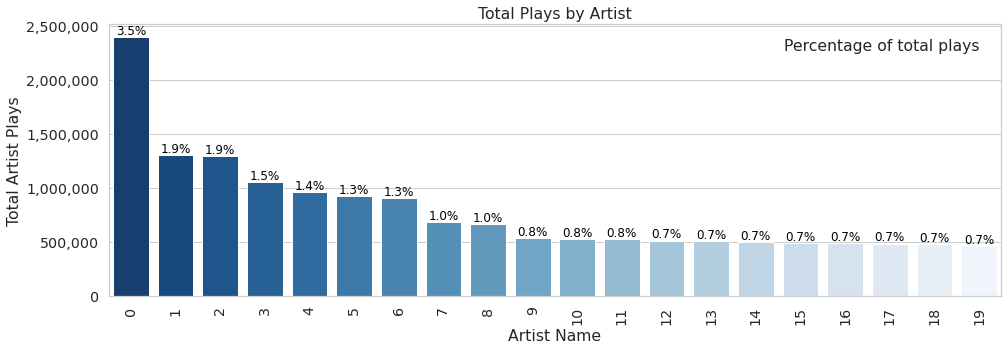

In [9]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


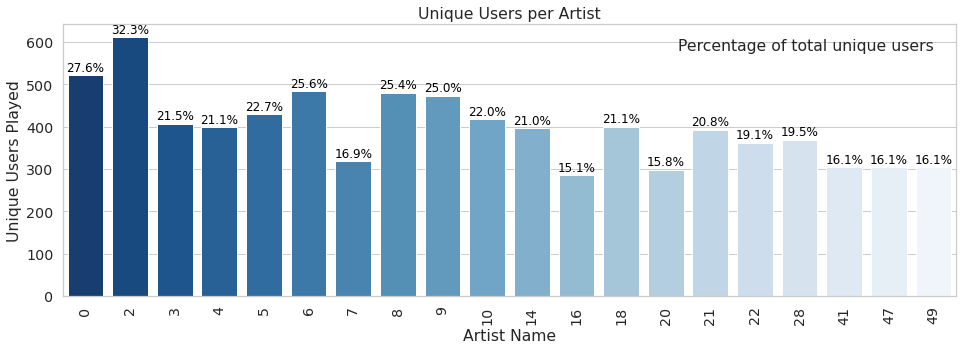

In [10]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

In [11]:
top_artists = artist_rank.index[0:12] # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"
# artist_rank is sorted by "totalArtistPlays"

x = artist_rank['totalUniqueUsers'] # TODO : "totalUniqueUsers" of "artist_rank"
y = artist_rank['totalArtistPlays'] # TODO :  "totalArtistPlays" of "artist_rank"
labels = artist_rank.index # TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


# Preprocessing (30 pts)

In [12]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [13]:
display(ap)

id             name  userID  artistID  playCount  totalUniqueUsers  \
2698   1642     Depeche Mode    1642        72     352698               282   
35825  2071           Thalía    2071       792     324663                26   
27265  1094               U2    1094       511     320725               185   
8081   1905             Blur    1905       203     257978               114   
26561  1664         Paramore    1664       498     227829               399   
...     ...              ...     ...       ...        ...               ...   
82025   712          Voxtrot     712      9485          1                 6   
82021   712  The Duke Spirit     712      9484          1                 2   
82019   712      Funky 4 + 1     712      9483          1                 1   
82018   712          Outfunk     712      9482          1                 1   
45026    35           Quidam      35      1173          1                 1   

       totalArtistPlays  avgUserPlays  playCountScaled  
2698            1301308   4614.567376         1.000000  
35825            350035  13462.884615         0.920513  
27265            493024   2664.994595         0.909347  
8081             318221   2791.412281         0.731441  
26561            963449   2414.659148         0.645960  
...                 ...           ...              ...  
82025              5313    885.500000         0.000000  
82021               325    162.500000         0.000000  
82019                 1      1.000000         0.000000  
82018                 1      1.000000         0.000000  
45026                 1      1.000000         0.000000  

[92834 rows x 9 columns]

In [14]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

# https://stackoverflow.com/questions/68814092/create-sparse-dataframe-from-a-pandas-dataframe-with-list-values
ratings_df = ap.explode(["artistID", "playCountScaled"])
ratings_df = ratings_df.pivot(index="userID", columns="artistID", values="playCountScaled")
display(ratings_df)

artistID  1      2         3      4      5         6      7      8      9      \
userID                                                                          
2           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
3           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
4           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
5           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
6           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
...         ...    ...       ...    ...    ...       ...    ...    ...    ...   
2095        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2096        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2097        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2099        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2100        NaN    NaN  0.001154    NaN    NaN  0.001143    NaN    NaN    NaN   

artistID  10     ...  18736  18737  18738  18739  18740  18741  18742  18743  \
userID           ...                                                           
2           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...         ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
2095        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2096        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2097        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2099        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2100        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

artistID  18744  18745  
userID                  
2           NaN    NaN  
3           NaN    NaN  
4           NaN    NaN  
5           NaN    NaN  
6           NaN    NaN  
...         ...    ...  
2095        NaN    NaN  
2096        NaN    NaN  
2097        NaN    NaN  
2099        NaN    NaN  
2100        NaN    NaN  

[1892 rows x 17632 columns]

In [ ]:
ratings_df

artistID  1      2         3      4      5         6      7      8      9      \
userID                                                                          
2           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
3           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
4           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
5           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
6           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
...         ...    ...       ...    ...    ...       ...    ...    ...    ...   
2095        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2096        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2097        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2099        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2100        NaN    NaN  0.001154    NaN    NaN  0.001143    NaN    NaN    NaN   

artistID  10     ...  18736  18737  18738  18739  18740  18741  18742  18743  \
userID           ...                                                           
2           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...         ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
2095        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2096        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2097        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2099        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2100        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

artistID  18744  18745  
userID                  
2           NaN    NaN  
3           NaN    NaN  
4           NaN    NaN  
5           NaN    NaN  
6           NaN    NaN  
...         ...    ...  
2095        NaN    NaN  
2096        NaN    NaN  
2097        NaN    NaN  
2099        NaN    NaN  
2100        NaN    NaN  

[1892 rows x 17632 columns]

In [15]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################

ratings = ratings_df.fillna(0).to_numpy()

In [16]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

print("Sparsity: {} %".format(np.count_nonzero(ratings)/ratings.size*100))

Sparsity: 0.2763750225421394 %


# Fitting(Training) Model (50pts)

In [17]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    A_rating = ratings > 0
    count = A_rating.sum(axis=1)

    train = ratings.copy()
    validation = np.zeros(ratings.shape)

    for i in range(ratings.shape[0]):
      if count[i] > MIN_USER_RATINGS:
          temp = np.random.choice(count[i], DELETE_RATING_COUNT)
          wh_samples = np.where(A_rating[i,:])[0]
          validation[i,wh_samples[temp]] = ratings[i,wh_samples[temp]]
          train[i,wh_samples[temp]] = 0

    return train, validation

In [18]:
train, val = train_test_split(ratings)

In [19]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    wh = np.where(ground_truth > 0)
    prediction = prediction[wh]
    ground_truth = ground_truth[wh]
    return sqrt(mean_squared_error(prediction, ground_truth))

In [20]:
class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
    p = np.repeat(P, Q.shape[0], axis=0)
    q = np.asarray([Q]*P.shape[0]).reshape(-1,3)
    r = np.sum(p * q, axis=1).reshape(P.shape[0], Q.shape[0])
    return r

  
  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #TODO : save the loss on train and validation data in each iteration

    # min sum((r_ui-p_u*q_i)^2+lamda*(q_i^2+p_u^2))
    # initialization
    self.P = np.random.normal(0, 1, size=(X_train.shape[0], self.n_latent_features)) #user
    self.Q = np.random.normal(0, 1, size=(X_train.shape[1], self.n_latent_features)) #artist
    self.E_tr = np.zeros((self.n_epochs,))
    self.E_val = np.zeros((self.n_epochs,))
    pred_x_train = np.zeros(X_train.shape)
    pred_x_val = np.zeros(X_val.shape)
    
    
    tr_samples = np.where(X_train > 0)
    val_samples = np.where(X_val > 0)
    tr_R = X_train[tr_samples]
    val_R = X_val[val_samples]

    for epoch in range(self.n_epochs):
      # P_temp = P[tr_samples[0]]
      # Q_temp = Q[tr_samples[1]]
      pred_x_train[tr_samples] = np.sum(self.P[tr_samples[0]] * self.Q[tr_samples[1]], axis=1)
      pred_x_val[val_samples] = np.sum(self.P[val_samples[0]] * self.Q[val_samples[1]], axis=1)
      
      E = X_train - pred_x_train
      Q_new = self.Q - 2 * self.learning_rate * (self.lmbda * self.Q - E.T@self.P)
      P_new = self.P - 2 * self.learning_rate * (self.lmbda * self.P - E@self.Q)

      self.Q = Q_new
      self.P = P_new
      self.E_tr[epoch] = rmse(pred_x_train, X_train)
      self.E_val[epoch] = rmse(pred_x_val, X_val)
      print('Epoch {}: learning rate: {}, training error: {}, validation error: {}'.format(epoch, self.learning_rate, self.E_tr[epoch], self.E_val[epoch]))
      # print(self.P, pred_x_train, X_train)

    return self

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
    p = np.repeat(self.P[user_index:user_index+1,:], self.Q.shape[0], axis=0)
    r = np.sum(p * self.Q, axis=1)
    wh = np.where(X_train[user_index,:]==0)
    r = r[wh]
    return r


In [21]:
#creating recommender object
recommender = Recommender().fit(train, val)

Epoch 0: learning rate: 0.001, training error: 1.7122030507193913, validation error: 1.7231565169702503
Epoch 1: learning rate: 0.001, training error: 1.4054292799326267, validation error: 1.444246537852726
Epoch 2: learning rate: 0.001, training error: 1.2344802344316734, validation error: 1.2906654727744018
Epoch 3: learning rate: 0.001, training error: 1.1118707359650433, validation error: 1.1806553259800583
Epoch 4: learning rate: 0.001, training error: 1.016149263077139, validation error: 1.094568419337272
Epoch 5: learning rate: 0.001, training error: 0.9379180472006567, validation error: 1.0239279044283787
Epoch 6: learning rate: 0.001, training error: 0.8720787905636825, validation error: 0.9641856117294234
Epoch 7: learning rate: 0.001, training error: 0.8155137696456778, validation error: 0.9125828777509345
Epoch 8: learning rate: 0.001, training error: 0.7661618766053702, validation error: 0.8673072487977391
Epoch 9: learning rate: 0.001, training error: 0.7225830347525598, 

Text(0, 0.5, 'rmse')

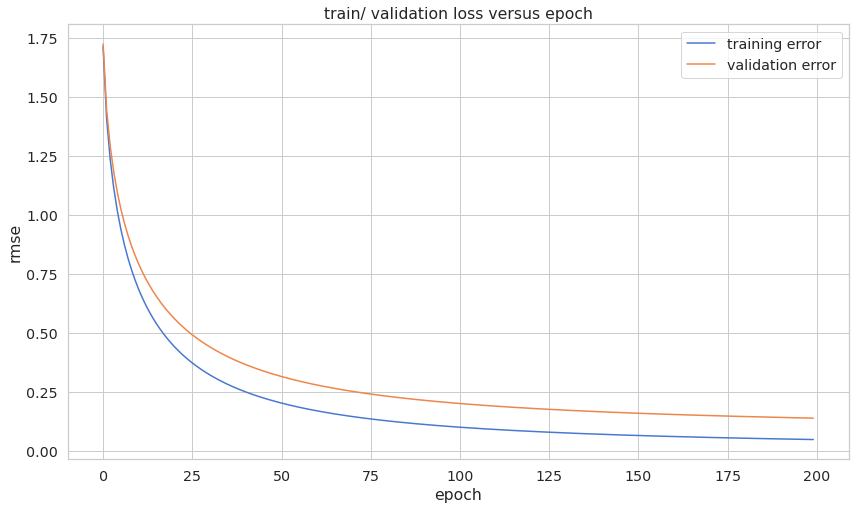

In [22]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################

plt.plot(recommender.E_tr)
plt.plot(recommender.E_val)
plt.legend(['training error', 'validation error'])
plt.title('train/ validation loss versus epoch')
plt.xlabel('epoch')
plt.ylabel('rmse')

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

ANSER:
تعداد گام های بهینه سازی و تعداد متغیر های ثانویه برای مقایسه ثابت نگه داشته شده است.
با افزایش مقدار لامدا می توانیم رگولاریزاسیون بیشتری ایجاد کنیم و اختلاف خطای آموزش و تست را کاهش می یابد. همچنین با افزایش مقدار گام آموزش می توانیم همگرایی سریع تری به نقطه بهینه داشته باشیم.

In [23]:
#creating recommender object
recommender2 = Recommender(n_epochs=200, n_latent_features=3, lmbda=0.5, learning_rate=0.005).fit(train, val)

Epoch 0: learning rate: 0.005, training error: 1.7918022448028434, validation error: 1.7951794662450662
Epoch 1: learning rate: 0.005, training error: 0.9724627151459285, validation error: 1.077950419127568
Epoch 2: learning rate: 0.005, training error: 0.5154016544235738, validation error: 0.6074392483719053
Epoch 3: learning rate: 0.005, training error: 0.3810204506542794, validation error: 0.47145037820707625
Epoch 4: learning rate: 0.005, training error: 0.3099865239951408, validation error: 0.39878812288347926
Epoch 5: learning rate: 0.005, training error: 0.26118134116242075, validation error: 0.3462223175461012
Epoch 6: learning rate: 0.005, training error: 0.22442126482169883, validation error: 0.3055652370447558
Epoch 7: learning rate: 0.005, training error: 0.19575894716037454, validation error: 0.2731326809447354
Epoch 8: learning rate: 0.005, training error: 0.17283668630792975, validation error: 0.2466678664047346
Epoch 9: learning rate: 0.005, training error: 0.1541379039

In [25]:
plt.plot(recommender.E_tr)
plt.plot(recommender.E_val)
plt.plot(recommender2.E_tr)
plt.plot(recommender2.E_val)
plt.legend(['training error', 'validation error', 'training error: modification', 'validation error: modification'])
plt.title('train / validation loss versus epoch')
plt.xlabel('epoch')
plt.ylabel('rmse')

Text(0, 0.5, 'rmse')

# Making recommendations

In [29]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [30]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [31]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

id                name    rating
0   472        3 Doors Down  0.196486
1   614           Pearl Jam  0.052734
2   978           Disturbed  0.042016
3  1118    A Perfect Circle  0.029742
4  1131                Tool  0.025657
5  2172              Gojira  0.021690
6  2474  Insane Clown Posse  0.021562
7  2479             Twiztid  0.016280
8  6257          Rob Zombie  0.010990
9  6618                 D12  0.010627

In [32]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

id             name    rating
0   1102  William Control  0.057568
1   5692     Roger Glover  0.053267
2   7544      Max Tannone  0.053222
3   9230             Gram  0.052106
4   9784       The Ganjas  0.051840
5  11491      Tiromancino  0.051092
6  13015               Go  0.050842
7  13249     the peabodys  0.050749
8  14536     Luis Enrique  0.050538
9  17084              OBK  0.050411

# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**